### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data from the csv file to dataframe

df=pd.read_csv('ac.data.csv')

In [3]:
# calling sample dataframe 
df.head(10)

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
5,2019-08-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-08-01 00:06:00,6.665446,9.065626,0.0,0.0,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
7,2019-08-01 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-08-01 00:08:00,6.674838,9.096130,0.0,0.0,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
9,2019-08-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Renaming the first attribute as 'Time'
df=df.rename(columns={'0':'Time'})
df.head(5)

,Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [5]:
# checking the shape of the dataframe
df.shape

(87840, 19)

* The dataframe contains 87840 rows and 19 columns.

In [6]:
# checking the data-types of all the attributes of the dataframe
df.dtypes

Time      object
AC 1     float64
AC 2     float64
AC 3     float64
AC 4     float64
AC 5     float64
AC 6     float64
AC 7     float64
AC 8     float64
AC 9     float64
AC 10    float64
AC 11    float64
AC 12    float64
AC 13    float64
AC 14    float64
AC 15    float64
AC 16    float64
AC 17    float64
AC 18    float64
dtype: object

* The entire dataset contains all the values in the float format , except the 'Time' attribute which is an object data-type.

In [7]:
# checking all the attributes names of the dataframe
df.columns

Index(['Time', 'AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8',
       'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16',
       'AC 17', 'AC 18'],
      dtype='object')

In [8]:
# checking if there are null-values in the dataset
df.isnull().sum()

Time         0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

* There are ample of null-vlaues present in the dataset , we need to check if we have to replace or drop the null-values.

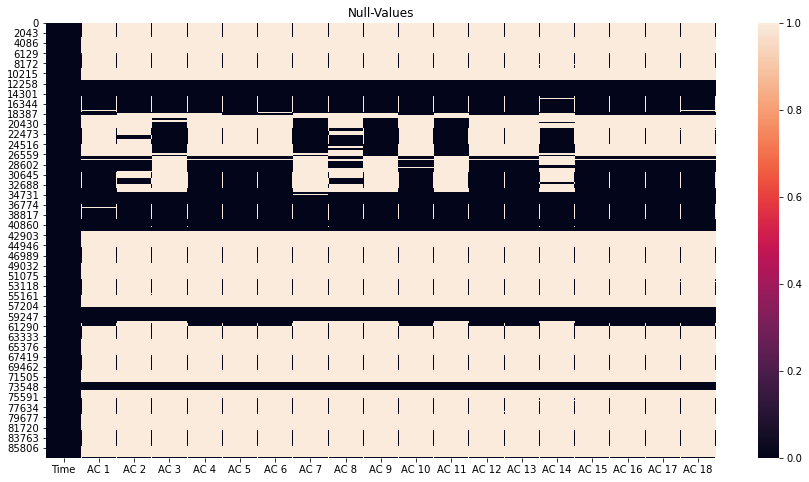

In [9]:
# graphical representation of the null-values
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

* The graph indicates that there many null-values present in between the dataset.

In [10]:
# checking the top 50 readings of the dataset
df.head(50)

,Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
5,2019-08-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
7,2019-08-01 00:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
9,2019-08-01 00:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* It can be observed that the power consumption reading have been taken on alternate mintues.

In [11]:
# Cross-checking the above conclusion if the other part of the dataset follows the same pattern or not
df.tail(50)

,Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
87790,2019-09-30 23:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87791,2019-09-30 23:11:00,2.545971,3.443772,2.402468,1.880162,0.892959,3.326555,5.484644,4.090394,6.061898,0.843549,4.466257,0.000000,5.019435,2.109715,5.158075,2.581857,2.235910,3.667709
87792,2019-09-30 23:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87793,2019-09-30 23:13:00,2.428603,3.474830,2.439505,1.518580,0.917934,0.000000,4.486743,4.155531,5.445307,1.050028,4.436985,1.554184,5.409851,1.834821,5.178821,2.018507,2.346194,3.958597
87794,2019-09-30 23:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87795,2019-09-30 23:15:00,0.000000,2.649025,2.398293,1.300645,0.894310,0.000000,3.332097,5.388323,5.031792,1.102983,3.890994,2.517889,5.571287,1.681533,5.057062,1.601493,2.353263,3.952709
87796,2019-09-30 23:16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87797,2019-09-30 23:17:00,0.000000,4.489090,2.396177,1.205916,0.887884,0.000000,3.038345,4.563354,4.677692,0.918922,3.859628,3.967199,5.519693,1.710523,5.030787,1.614605,2.303919,3.946161
87798,2019-09-30 23:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87799,2019-09-30 23:19:00,2.789981,5.572586,2.391398,1.410107,0.907177,0.000000,2.706552,4.297543,4.512986,1.002830,4.543769,2.492508,5.358547,1.673605,5.132486,1.679565,2.696776,3.699258


* We can confirm that the power consumption reading taken is recorded on alternate minute basis.

In [12]:
# dropping the nan value rows as we can observe that the data has been recorded on alternate minute basis , so there no need to fill nan values with any mean value
df=df.dropna()
df     # dataframe witout nan values

,Time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
6,2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
8,2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87831,2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
87833,2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647


In [13]:
# new shape of the dataframe
df.shape

(34642, 19)

* The dataframe has 34642 rows and 19 columns now.

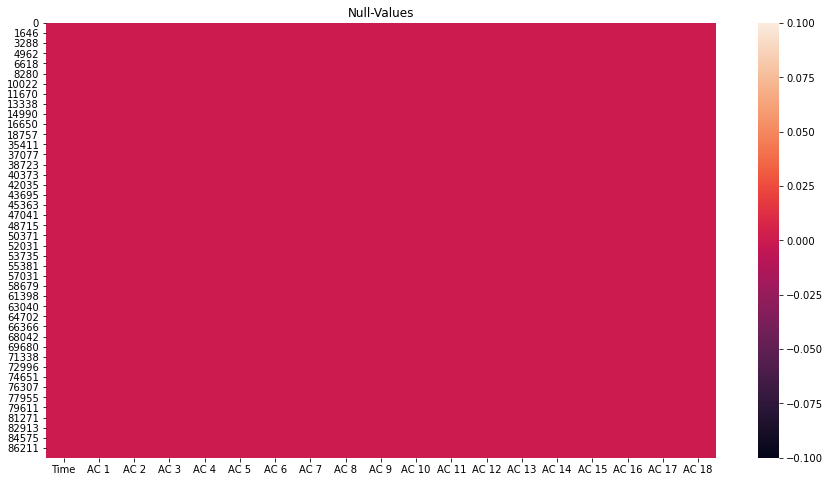

In [14]:
# checking if the graph has changed after removing nan values
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()

* The graph has become uniform and with recorded power consumption values plotted in the graph.

## Visualisation

AC 1        AxesSubplot(0.125,0.125;0.036215x0.755)
AC 2     AxesSubplot(0.168458,0.125;0.036215x0.755)
AC 3     AxesSubplot(0.211916,0.125;0.036215x0.755)
AC 4     AxesSubplot(0.255374,0.125;0.036215x0.755)
AC 5     AxesSubplot(0.298832,0.125;0.036215x0.755)
AC 6      AxesSubplot(0.34229,0.125;0.036215x0.755)
AC 7     AxesSubplot(0.385748,0.125;0.036215x0.755)
AC 8     AxesSubplot(0.429206,0.125;0.036215x0.755)
AC 9     AxesSubplot(0.472664,0.125;0.036215x0.755)
AC 10    AxesSubplot(0.516121,0.125;0.036215x0.755)
AC 11    AxesSubplot(0.559579,0.125;0.036215x0.755)
AC 12    AxesSubplot(0.603037,0.125;0.036215x0.755)
AC 13    AxesSubplot(0.646495,0.125;0.036215x0.755)
AC 14    AxesSubplot(0.689953,0.125;0.036215x0.755)
AC 15    AxesSubplot(0.733411,0.125;0.036215x0.755)
AC 16    AxesSubplot(0.776869,0.125;0.036215x0.755)
AC 17    AxesSubplot(0.820327,0.125;0.036215x0.755)
AC 18    AxesSubplot(0.863785,0.125;0.036215x0.755)
dtype: object

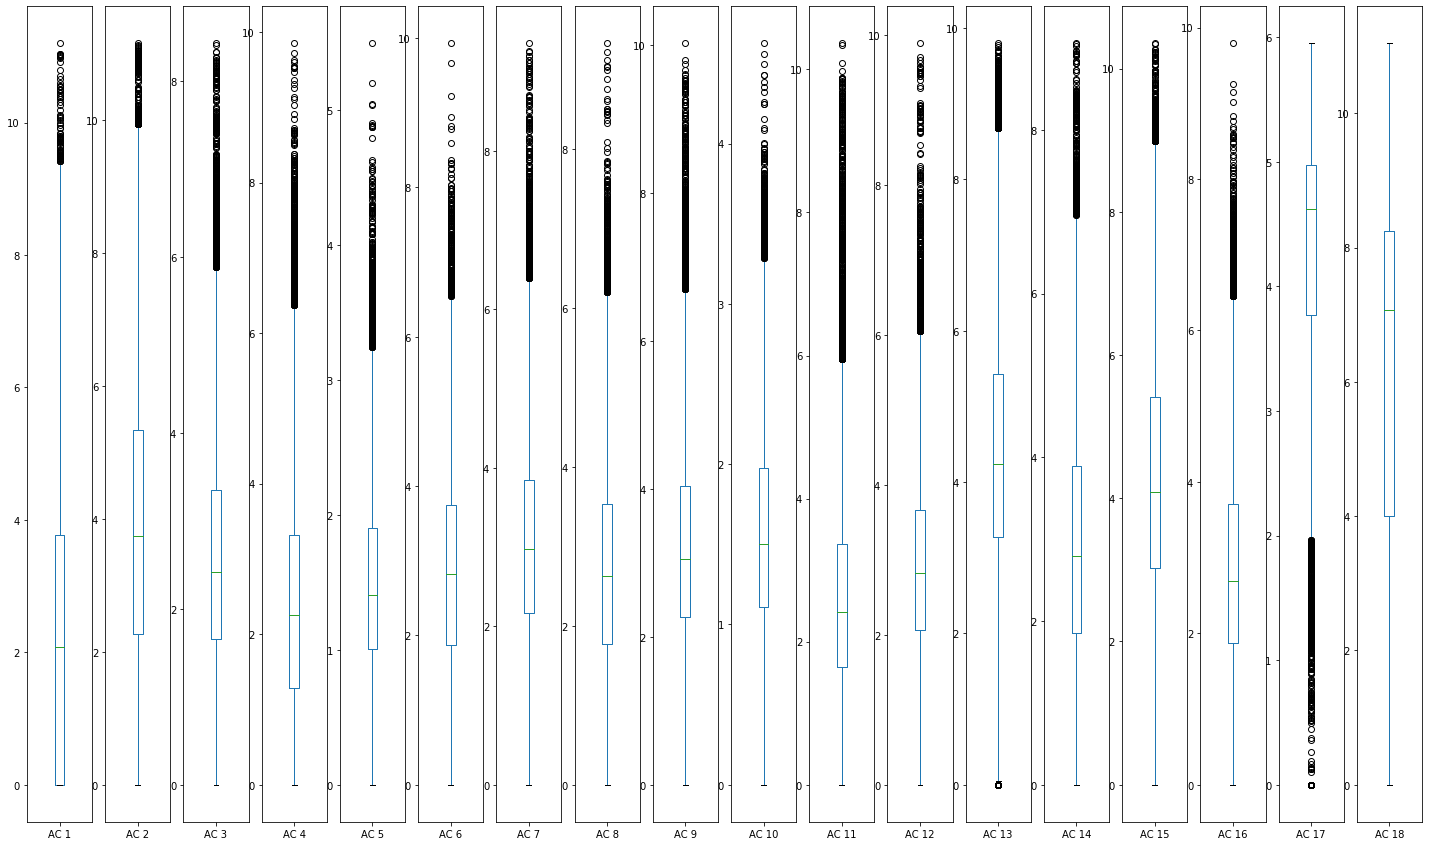

In [15]:
# boxplot indicates if there are outliers present in the dataset
df.plot(kind='box',figsize=(25,15),sharex=False , subplots=True)

* There are extreme outliers present in all attributes , except for attribute 'AC 18'
* The presence of extreme outliers can be due to multiple factors like measurement/recodring errors , experimential errors or dummy outliers made to test detect methods.
* For visualisation we need to analyse the dataset in it's most origin form , removing of outliers is important before passing it to the model for machine learning

On observing closely the dataset we can see that the readings of power consumption by the AC's have been recorded on alternte mintues , the total time readings after removing nan values are 34642.
Starting from 00:00:00 to 23:59:00 total power recordings for 24 hrs are 720 (1441/2).
So on dividing 34642 by 720 , we get 48.11.
The recorded data is for around 48 days of AC usage in the hotel


We are going to use this information to analyse the data on the graphs.

### Univariate Analysis

Text(0, 0.5, 'Power Reading')

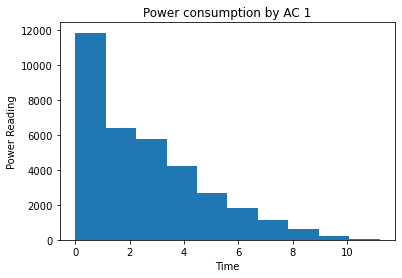

In [16]:
# plotting histogram for 'AC 1'
df['AC 1'].plot(kind='hist')
plt.title('Power consumption by AC 1')
plt.xlabel('Time')
plt.ylabel('Power Reading')

* From the graph we can observe that there has been fall in the usage of ac as the power consumption is high in the beginning of the data recording , but with time it has decreased over the period of days.
* This indicates that during the time of 48 days when we started recording the power , at that time the AC 1 has been consuming power which means it was high at use possibly summer time.
* As the power consumption went reducing , it indicates that there must have been climatic changes.

Let's check if the oberved pattern of reduction of 'AC 1' usage with time follows up for the other AC's as well or not.

<ipython-input-17-a724520934b4>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


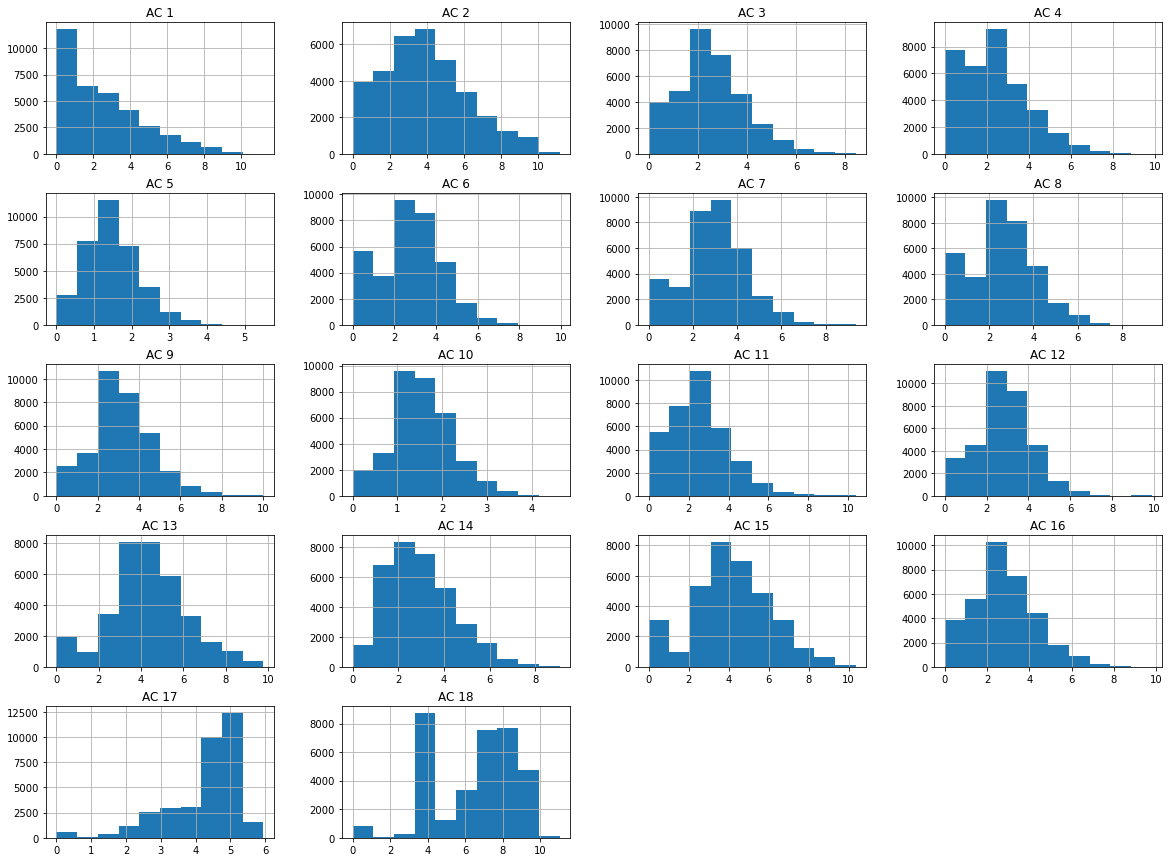

In [17]:
fig = plt.figure(figsize=(20,15)) # univariate analysis on all the attributes of the dataset
ax = fig.gca() 
df.hist(ax=ax)
plt.show()

* The pattern observed in the usage of 'AC 1' is not followed up by all the other AC's , instead 'AC 17' & 'AC 18' have been in minimu use initially.
* Since the pattern is not uniform for all the AC's we cannot conclude that their has been significant change in the climate for the power consumption recorded data points.
* Power consumption for 'AC 17' has increased over the period of time.
* AC 2,3,5,7,9,10,12,13,14,15 and 16 have been consuming power below 4 initially , then in mid days of experiment consumed power average of 8.
* AC 6,8 and 11 have been consuming power aroung 6 initially which increased with time and gradually decreased.
* AC 4 consumed power around 8 initially which decresed with time with little rise in mid.

In [18]:
# Checking which AC has consumed highest and lowest power accross the 48 days of recording power consumption

df_new=df.drop(['Time'],axis=1)

for i in df_new.columns:
    df[i].sum()
    print(df[i].sum())

82936.04491068103
134136.09060479378
86767.76513209827
80136.76223144722
50800.5698975077
93847.29454928159
102025.3876261093
88994.93212779403
109119.50361113372
53327.65713668232
86125.61889539582
97550.84517573059
149411.07440800895
102438.45986641974
142868.3328609079
95809.47417427484
147405.83881611307
223573.07607886405


In [19]:
df.sum()

Time     2019-08-01 00:00:002019-08-01 00:02:002019-08-...
AC 1                                                 82936
AC 2                                                134136
AC 3                                               86767.8
AC 4                                               80136.8
AC 5                                               50800.6
AC 6                                               93847.3
AC 7                                                102025
AC 8                                               88994.9
AC 9                                                109120
AC 10                                              53327.7
AC 11                                              86125.6
AC 12                                              97550.8
AC 13                                               149411
AC 14                                               102438
AC 15                                               142868
AC 16                                              95809

In [20]:
a=(103997.42299970888,
169113.14794639774,
112272.95704198061,
104678.0052689929,
62151.00765294758,
110085.43191506552,
130202.00933349252,
111388.85621634884,
139011.02409215237,
67210.22798414802,
105076.19009676644,
118009.30099534965,
187112.63099443587,
127466.56177218203,
176883.2594244619,
122390.19527925293,
184428.46239606198,
282567.56914566894)

In [21]:
min(a)

62151.00765294758

* 'AC 5' have been used the least among all the AC's.

In [22]:
max(a)

282567.56914566894

* 'Ac 18' have been used the most among all the AC's.

<AxesSubplot:>

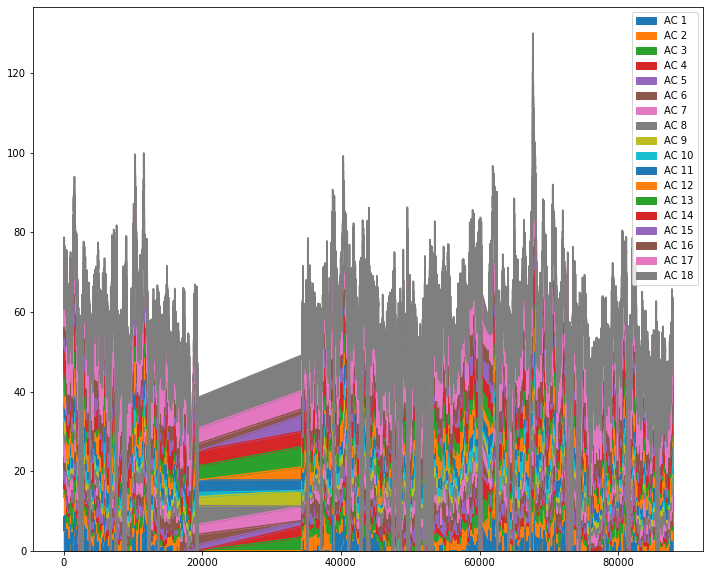

In [23]:
# checking with area plot graph which AC consumes most of the power
df.plot(kind='area' , figsize=(12,10))

* 'AC 18' can be seen occupying largest area which it indicates it has been using most of the power among all AC's.